In [ ]:
import pystac_client
import planetary_computer
import rasterio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Set the environment variable PC_SDK_SUBSCRIPTION_KEY, or set it here.
# The Hub sets PC_SDK_SUBSCRIPTION_KEY automatically.
# pc.settings.set_subscription_key(<YOUR API Key>)

client = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1/",
    modifier=planetary_computer.sign_inplace,
)

In [ ]:
collections = [
    "3dep-lidar-hag",
    "3dep-lidar-dsm",
    "3dep-lidar-pointsourceid",
    "3dep-lidar-intensity",
    "3dep-lidar-dtm",
    "3dep-lidar-dtm-native",
    "3dep-lidar-returns",
    "3dep-lidar-classification",
]

search = client.search(
    collections=collections,
    intersects={
        "type": "Point",
        "coordinates": [-118.20535, 34.03396], #Boyle Heights, Los Angeles
    },
    datetime="2022",
)
items = search.item_collection()

In [ ]:
dsm_items = [item for item in items.items if item.id == "3dep-lidar-dsm"]
if dsm_items:
    dsm_item = dsm_items[0]
    dsm_href = dsm_item.assets["data"].href

    with rasterio.open(dsm_href) as src:
        dsm = src.read().squeeze()

    dsm = np.where(dsm > 0, dsm, np.nan)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(dsm, cmap="gray")
    ax.set_axis_off()
    plt.show()
else:
    print("No items found for '3dep-lidar-dsm'")

In [ ]:
collections = [
    "3dep-lidar-hag",
    "3dep-lidar-dsm",
    "3dep-lidar-pointsourceid",
    "3dep-lidar-intensity",
    "3dep-lidar-dtm",
    "3dep-lidar-dtm-native",
    "3dep-lidar-returns",
    "3dep-lidar-classification",
]

search = client.search(
    collections=collections,
    intersects={
        "type": "Point",
        "coordinates": [-77.10058811018344, 38.838335717896314],
    },
    datetime="2018",
)
items = {x.collection_id: x for x in search.get_all_items()}
items

There is no problem with this code, but there is no DSM for this area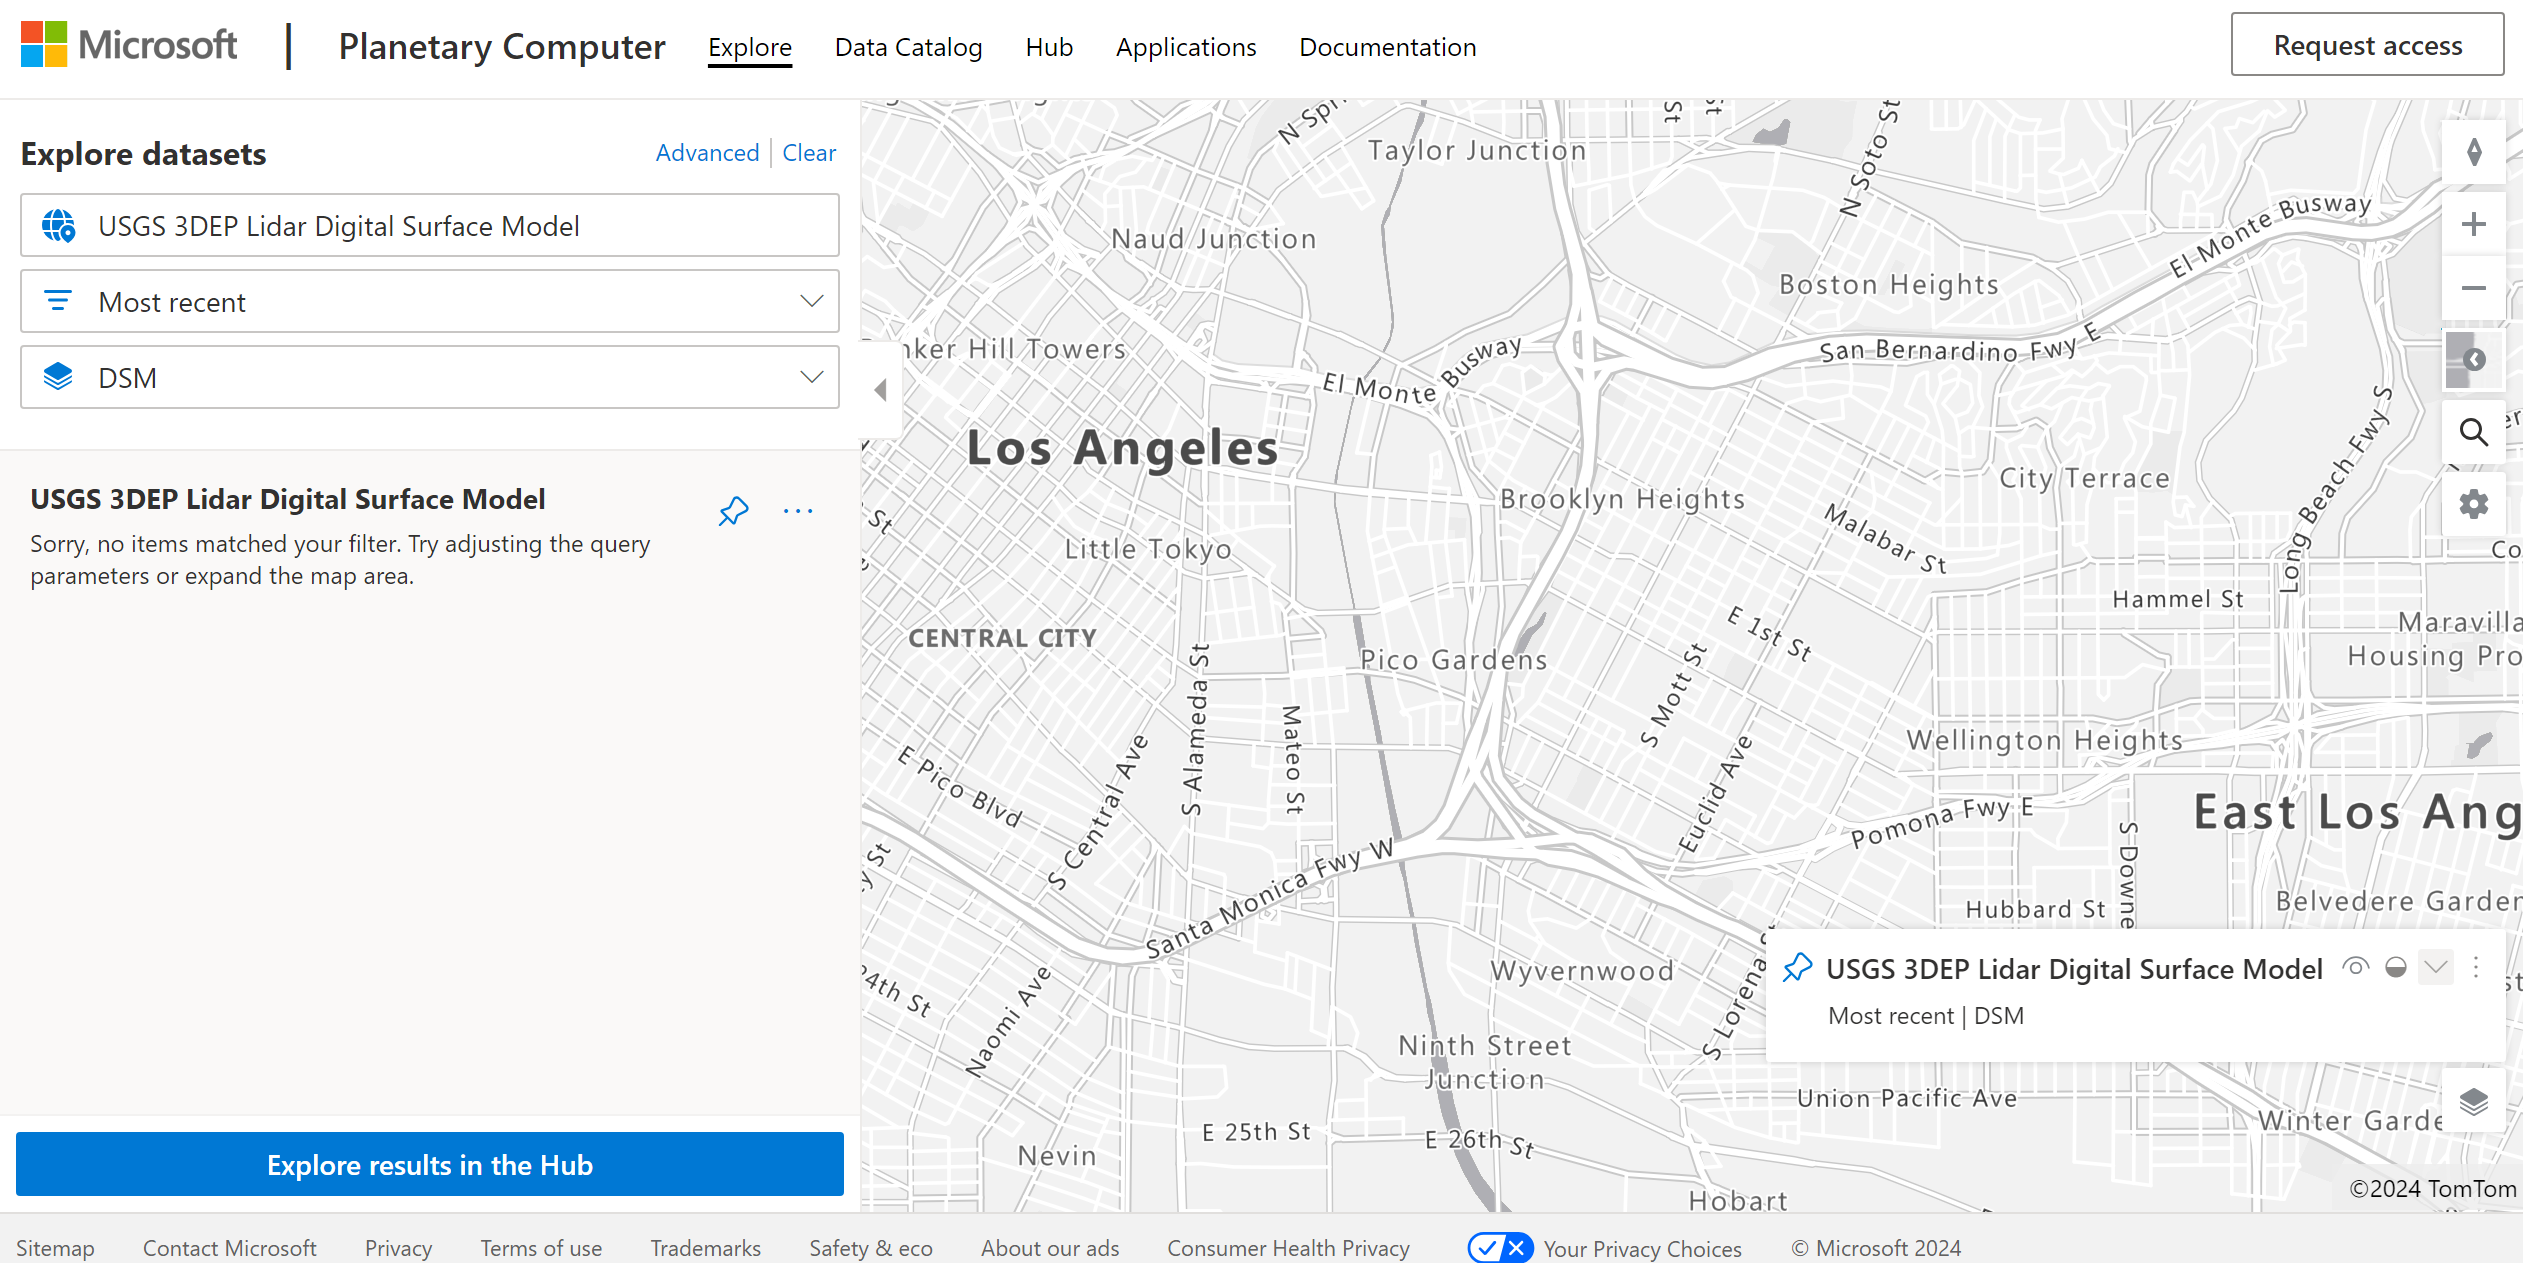